# desc ...

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/instagram_post_04-05-2020.csv', low_memory=False)

In [3]:
df.head()

,id,owner_id,shortcode,post_url,display_url,published,caption,likes_count,comments_count,comments,location,is_video,video_view_count,inst_caption,query,note,created_at,status
0,2290507756257899980,3.385755e+10,B_JhKsvB3XM,https://www.instagram.com/p/B_JhKsvB3XM/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-04-19 04:17:04+00,#75летпобеды #победа75 #мыпомним #великаяпо...,41,0,NaN,NaN,False,NaN,"Photo by Бакрчинский СК on April 18, 2020. Ima...",#бессмертныйполк,NaN,2020-04-30 03:05:05.305154+00,True
1,2283363816720116246,3.272358e+10,B-wI0sklSoW,https://www.instagram.com/p/B-wI0sklSoW/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-04-09 07:43:20+00,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,9,0,NaN,NaN,False,NaN,"Photo by Детский сад №9 «Ромашка» on April 09,...",#бессмертныйполк,NaN,2020-04-30 03:05:07.166014+00,True
2,2283364236083479227,3.272358e+10,B-wI6zIlkK7,https://www.instagram.com/p/B-wI6zIlkK7/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-04-09 07:44:10+00,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,10,0,NaN,NaN,False,NaN,Photo by Детский сад №9 «Ромашка» in Elista. I...,#бессмертныйполк,NaN,2020-04-30 03:05:07.165451+00,True
3,2283370574013238191,2.753139e+09,B-wKXByo4uv,https://www.instagram.com/p/B-wKXByo4uv/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-04-09 07:56:45+00,Вышел в свет новый номер газеты «Каширские изв...,94,1,NaN,NaN,False,NaN,Photo by Каширское информагентство on April 09...,#бессмертныйполк,NaN,2020-04-30 03:05:07.164758+00,True
4,2283365441896285449,6.646030e+09,B-wJMWIoYUJ,https://www.instagram.com/p/B-wJMWIoYUJ/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-04-09 07:57:34+00,Вот что получилось у меня после первых прислан...,8,0,NaN,NaN,True,41.0,NaN,#бессмертныйполк,NaN,2020-04-30 03:05:07.16411+00,True


In [4]:
df = df[['id', 'caption']]
df.dropna(subset=['caption'], inplace=True)
df.insert(2, 'tags', np.nan) 
df.head()

,id,caption,tags
0,2290507756257899980,#75летпобеды #победа75 #мыпомним #великаяпо...,NaN
1,2283363816720116246,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,NaN
2,2283364236083479227,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,NaN
3,2283370574013238191,Вышел в свет новый номер газеты «Каширские изв...,NaN
4,2283365441896285449,Вот что получилось у меня после первых прислан...,NaN


In [5]:
import re

In [6]:
text = df.loc[0, 'caption']

In [7]:
[tag.lower() for tag in re.findall('#(\w+)', text)]

['75летпобеды',
 'победа75',
 'мыпомним',
 'великаяпобеда',
 'бессмертныйполк',
 'помнимгордимся',
 'ветераны',
 'культураонлайн',
 '100летиетасср',
 'культурныйтатарстан',
 'айдадомой',
 'фотоальбомпобеды']

In [8]:
df['tags'] = df.caption.apply(lambda caption: [tag.lower() for tag in re.findall('#(\w+)', caption)])

In [9]:
df.head(10)

,id,caption,tags
0,2290507756257899980,#75летпобеды #победа75 #мыпомним #великаяпо...,"[75летпобеды, победа75, мыпомним, великаяпобед..."
1,2283363816720116246,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,"[япомнюягоржусь, деньпобеды, 9мая, бессмертный..."
2,2283364236083479227,«Мой дедушка - герой!» #япомнюягоржусь #деньпо...,"[япомнюягоржусь, деньпобеды, 9мая, бессмертный..."
3,2283370574013238191,Вышел в свет новый номер газеты «Каширские изв...,"[каширскоеиа, кашира, подмосковье, вкурсе2020,..."
4,2283365441896285449,Вот что получилось у меня после первых прислан...,"[вокальнаястудиядебют, флешмоб2020, бессмертны..."
5,2283379684452594602,"Приближается великая дата: ""75 лет Великой Поб...","[бессмертныйполк, самоизоляция, победа, бессме..."
6,2283325058959491394,#Ветерансомной #Бессмертныйполк\n #Кайелло\n#Л...,"[ветерансомной, бессмертныйполк, кайелло, ливан]"
7,2283379989344439749,Сегодня 9 апреля 2020 год. До празднования 75-...,"[9мая, герои, подвиги, бессмертныйполк]"
8,2283382627486261208,ПАРАД ПОБЕДЫ СОСТОИТСЯ! 🎉\nВ связи с пандемией...,"[фотосалонсемья, бессмертныйполк, 9мая]"
9,2283387217621815872,#бессмертныйполк #үлемсезполк #75летпобеды \n#...,"[бессмертныйполк, үлемсезполк, 75летпобеды, бо..."


In [10]:
df.dtypes

id         object
caption    object
tags       object
dtype: object

In [11]:
len(df[df['tags'].str.len() == 0])

6720

In [12]:
df.shape

(183928, 3)

In [13]:
df = df[df['tags'].str.len() != 0]

In [73]:
df.shape

(177208, 3)

# Все теги

In [74]:
flattened_tags_df = pd.Series([tag for tag_list in df.tags for tag in tag_list])

In [ ]:
flattened_tags_df.nunique()

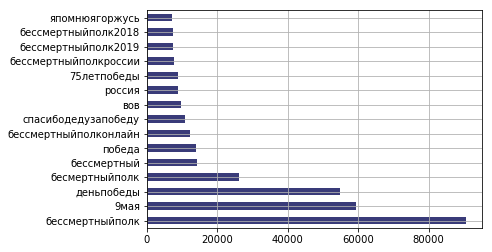

In [151]:
flattened_tags_df.value_counts(normalize=False)[:15].plot(
    kind='barh',
    grid=True,
    colormap='tab20b'
)

# Теги по кол-ву

In [81]:
flattened_tags_df.value_counts().describe()

count    118484.000000
mean         12.077234
std         390.963640
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       90510.000000
dtype: float64